In [224]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
#k-means is an iterative cluster algorithm

In [225]:
#Exploratory Data Analysis

#Read dataframe
data = pd.read_csv("./bodyPerformance.csv")
data.head(5)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [226]:
#describe the data
data.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [227]:
#preprocessing
#drop all null values from data
data = data.dropna()
#data encoding - convert all string columns to floats
label_encoder = preprocessing.LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['class'] = label_encoder.fit_transform(data['class'])

In [228]:
#reprint dataset
data.head(5)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1


                              age    gender  height_cm  weight_kg  body fat_%  \
age                      1.000000 -0.060229  -0.293980  -0.099966    0.242302   
gender                  -0.060229  1.000000   0.730899   0.672887   -0.551407   
height_cm               -0.293980  0.730899   1.000000   0.734909   -0.515440   
weight_kg               -0.099966  0.672887   0.734909   1.000000   -0.084065   
body fat_%               0.242302 -0.551407  -0.515440  -0.084065    1.000000   
diastolic                0.158508  0.228552   0.145933   0.262317    0.048059   
systolic                 0.211167  0.323921   0.210186   0.338943   -0.030376   
gripForce               -0.179583  0.800184   0.735024   0.700119   -0.541788   
sit and bend forward_cm -0.070033 -0.327467  -0.221970  -0.296249   -0.071225   
sit-ups counts          -0.544581  0.474596   0.500424   0.294899   -0.608912   
broad jump_cm           -0.435172  0.704149   0.674589   0.479564   -0.673273   
class                    0.0

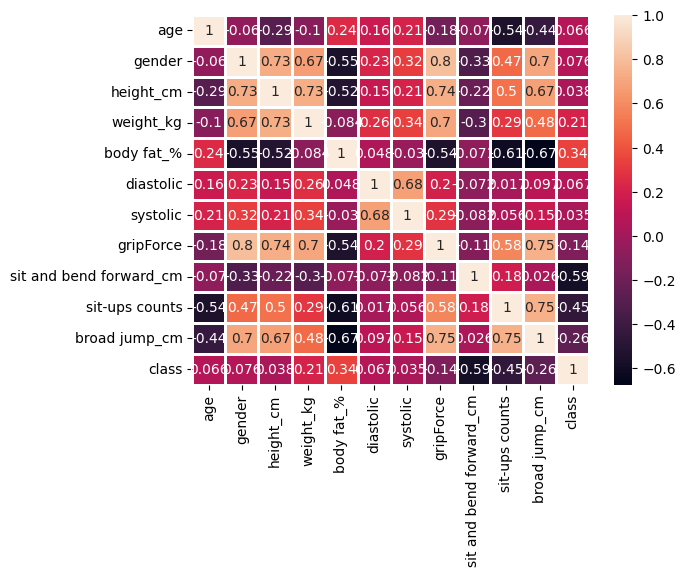

<Figure size 1200x800 with 0 Axes>

In [229]:
#show heatmap for data correlation
#drop string values in the dataset
print(data.corr())
corr_plot = sns.heatmap(data.corr(),annot = True,linewidths=1 )
plt.figure(figsize=(12,8))

plt.show()

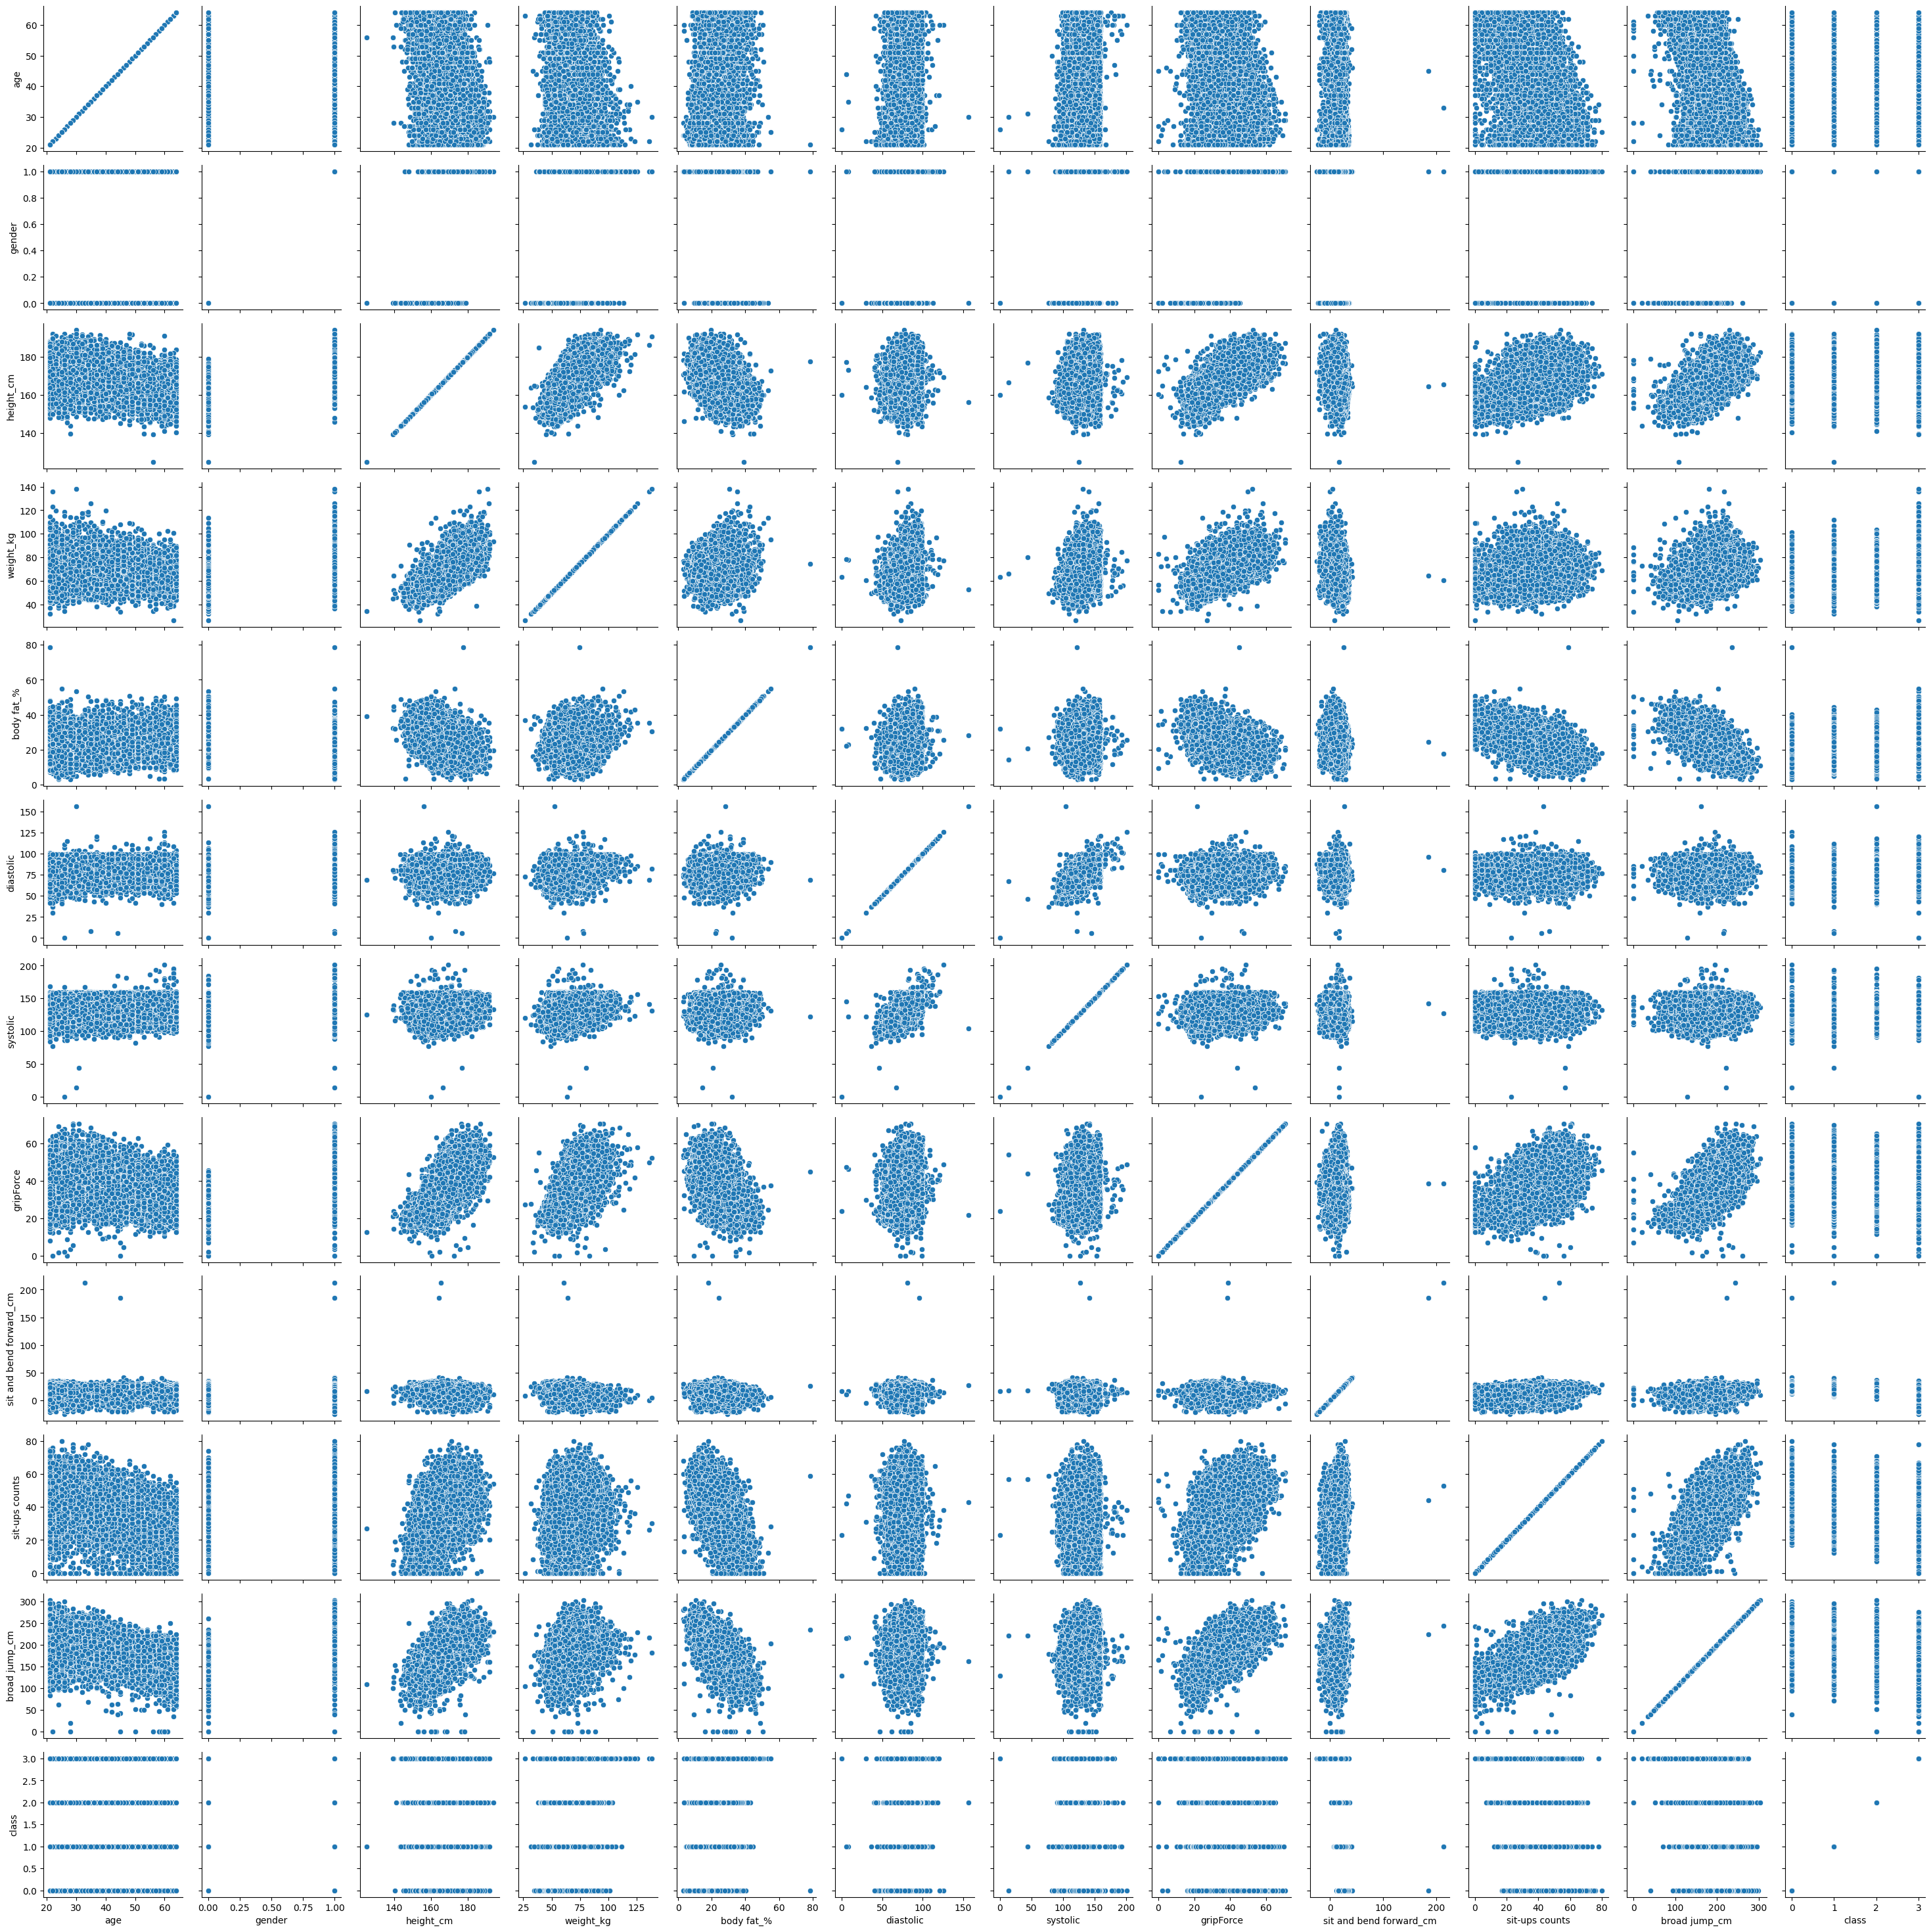

In [230]:
#visualize correlations
viz = sns.PairGrid(data)
viz.map(sns.scatterplot)

In [231]:
#ITERATION 000

#feature selection
featurecols = ['height_cm', 'sit and bend forward_cm', 'broad jump_cm']
X = data[featurecols]#feature
y = data['gender']#target Variable


#This is the portion where data would usually be split, that is not the case in K-means clustering


km = KMeans(n_clusters=3, random_state=0)
km.fit(X)


KMeans(n_clusters=3, random_state=0)

In [232]:
#predict the cluster for each point
y_cluster_kmeans = km.predict(X)

In [233]:
#Print model scores
silhouette_score = metrics.silhouette_score(data, y_cluster_kmeans)
completeness = metrics.completeness_score(y, y_cluster_kmeans)
homogenity = metrics.homogeneity_score(y, y_cluster_kmeans)

print("Completeness Score: ", completeness)
print("Silhouette Score: ", silhouette_score)
print("Homogeneity Score: ", homogenity)

Completeness Score:  0.2806899657320523
Silhouette Score:  0.273789162271316
Homogeneity Score:  0.452711678257412


In [234]:
#print silhouette score
from sklearn import metrics
y_cluster_kmeans = km.predict(X)
y_cluster_kmeans
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.45983695553641946

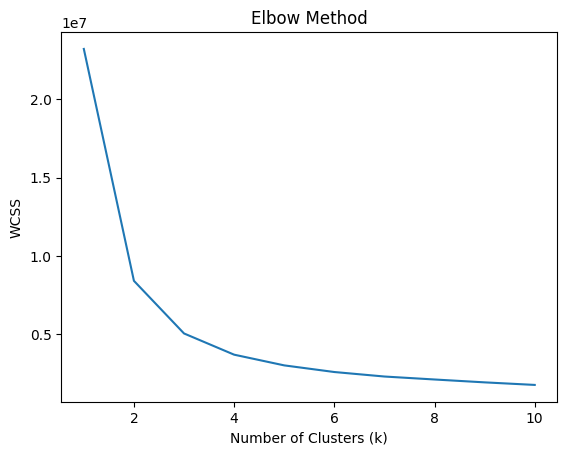

In [235]:
#implement elbow arm method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Sum of squared distances to the closest centroid (WCSS)

# Plot the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [236]:
#Print the dataset of comparison
print(X)

       height_cm  sit and bend forward_cm  broad jump_cm
0          172.3                     18.4          217.0
1          165.0                     16.3          229.0
2          179.6                     12.0          181.0
3          174.5                     15.2          219.0
4          173.8                     27.1          217.0
...          ...                      ...            ...
13388      172.1                     17.4          198.0
13389      179.7                      1.1          167.0
13390      177.2                     16.4          229.0
13391      146.1                      9.2           75.0
13392      164.0                      7.1          180.0

[13393 rows x 3 columns]


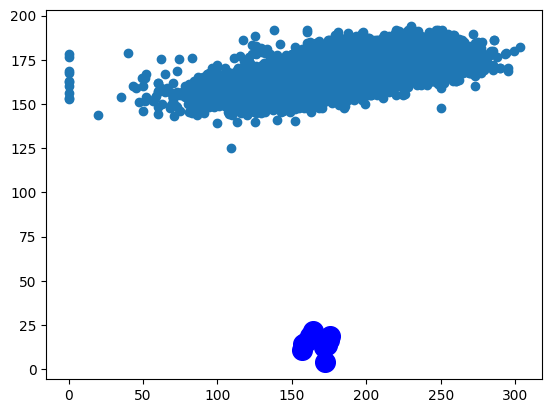

In [237]:
#Plot data

# Plot the data
plt.scatter(X['broad jump_cm'], X['height_cm'])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='blue')                           # Set centroid color
plt.show()

In [238]:
#ITERATION 001 - Change the number of Cluster


#feature selection
featurecols = [ 'height_cm', 'sit and bend forward_cm']
X = data[featurecols]#feature
y = data['gender']#target Variable


#This is the portion where data would usually be split, that is not the case in K-means clustering


km = KMeans(n_clusters=2, random_state=0)
km.fit(X)


KMeans(n_clusters=2, random_state=0)

In [239]:
#predict the cluster for each point
y_cluster_kmeans = km.predict(X)

In [240]:
#Print model scores
silhouette_score = metrics.silhouette_score(data, y_cluster_kmeans)
completeness = metrics.completeness_score(y, y_cluster_kmeans)
homogenity = metrics.homogeneity_score(y, y_cluster_kmeans)

print("Completeness Score: ", completeness)
print("Silhouette Score: ", silhouette_score)
print("Homogeneity Score: ", homogenity)

Completeness Score:  0.4009149044905597
Silhouette Score:  0.19482100717463413
Homogeneity Score:  0.4203357564006076


In [241]:
#print silhouette score
from sklearn import metrics
y_cluster_kmeans = km.predict(X)
y_cluster_kmeans
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.3762802686436752

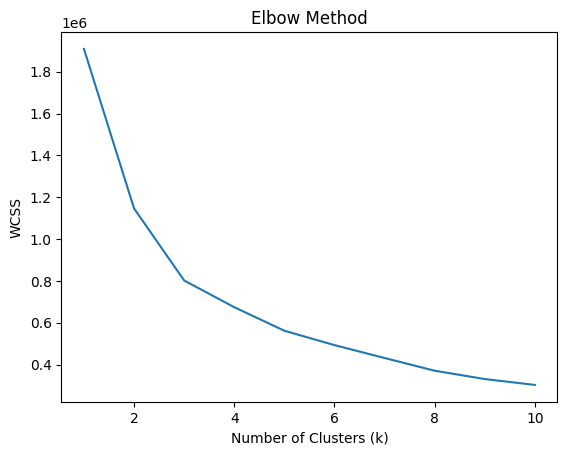

In [242]:
#implement elbow arm method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Sum of squared distances to the closest centroid (WCSS)

# Plot the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [243]:
#Print the dataset of comparison
print(X)

       height_cm  sit and bend forward_cm
0          172.3                     18.4
1          165.0                     16.3
2          179.6                     12.0
3          174.5                     15.2
4          173.8                     27.1
...          ...                      ...
13388      172.1                     17.4
13389      179.7                      1.1
13390      177.2                     16.4
13391      146.1                      9.2
13392      164.0                      7.1

[13393 rows x 2 columns]


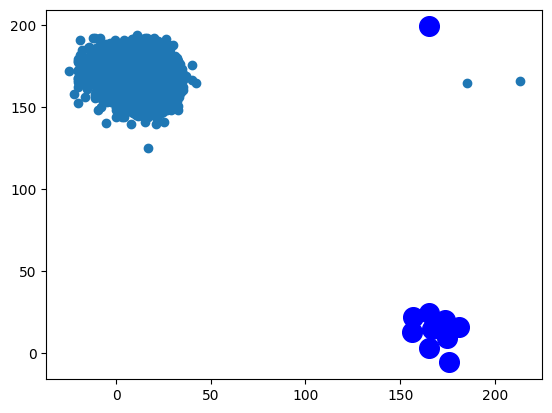

In [244]:
#Plot data

# Plot the data
plt.scatter(X['sit and bend forward_cm'], X['height_cm'])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='blue')                           # Set centroid color
plt.show()

In [245]:
#ITERATION 002 - change the features and columns selected

#feature selection
featurecols = [ 'height_cm', 'broad jump_cm']
X = data[featurecols]#feature
y = data['gender']#target Variable


#This is the portion where data would usually be split, that is not the case in K-means clustering


km = KMeans(n_clusters=2, random_state=0)
km.fit(X)


KMeans(n_clusters=2, random_state=0)

In [246]:
#predict the cluster for each point
y_cluster_kmeans = km.predict(X)

In [247]:
#Print model scores
silhouette_score = metrics.silhouette_score(data, y_cluster_kmeans)
completeness = metrics.completeness_score(y, y_cluster_kmeans)
homogenity = metrics.homogeneity_score(y, y_cluster_kmeans)

#completeness score is the capture of the entirety of a class
print("Completeness Score: ", completeness) 
# a silhouette score is used to quantify the cluster, (-1,1), higher number indicates better seperation
print("Silhouette Score: ", silhouette_score)
print("Homogeneity Score: ", homogenity)
#homogeneity is the measure of cluster points from one specific category


Completeness Score:  0.39214859896262655
Silhouette Score:  0.3831520767017062
Homogeneity Score:  0.41010644630423376


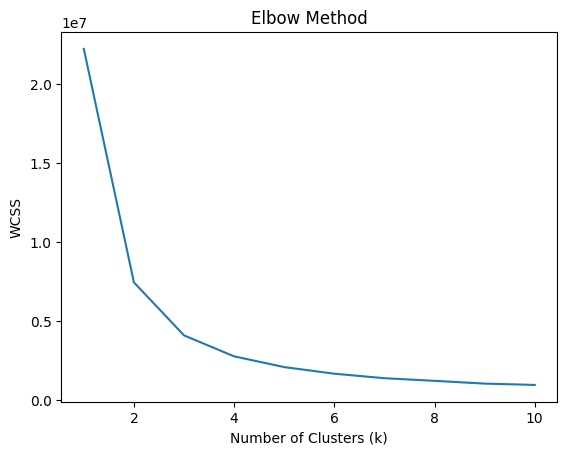

In [248]:
#implement elbow arm method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Sum of squared distances to the closest centroid (WCSS)

# Plot the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [249]:
#Print the dataset of comparison

print(X)

       height_cm  broad jump_cm
0          172.3          217.0
1          165.0          229.0
2          179.6          181.0
3          174.5          219.0
4          173.8          217.0
...          ...            ...
13388      172.1          198.0
13389      179.7          167.0
13390      177.2          229.0
13391      146.1           75.0
13392      164.0          180.0

[13393 rows x 2 columns]


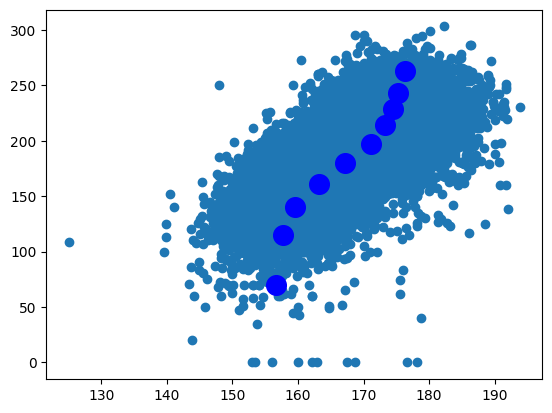

In [250]:
#Plot data

# Plot the data
plt.scatter(X['height_cm'], X['broad jump_cm'])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='blue')                           # Set centroid color
plt.show()

In [259]:
#ITERATION 003 - change the features and columns selected(Again)

#feature selection
featurecols = [ 'sit and bend forward_cm','broad jump_cm']
X = data[featurecols]#feature
y = data['gender']#target Variable


#This is the portion where data would usually be split, that is not the case in K-means clustering


km = KMeans(n_clusters=2, random_state=0)
km.fit(X)


KMeans(n_clusters=2, random_state=0)

In [260]:
#predict the cluster for each point
y_cluster_kmeans = km.predict(X)

In [261]:
#Print model scores
silhouette_score = metrics.silhouette_score(data, y_cluster_kmeans)
completeness = metrics.completeness_score(y, y_cluster_kmeans)
homogenity = metrics.homogeneity_score(y, y_cluster_kmeans)

#completeness score is the capture of the entirety of a class
print("Completeness Score: ", completeness) 
# a silhouette score is used to quantify the cluster, (-1,1), higher number indicates better seperation
print("Silhouette Score: ", silhouette_score)
print("Homogeneity Score: ", homogenity)
#homogeneity is the measure of cluster points from one specific category

Completeness Score:  0.3812296604147419
Silhouette Score:  0.3817550455849169
Homogeneity Score:  0.398669683761429


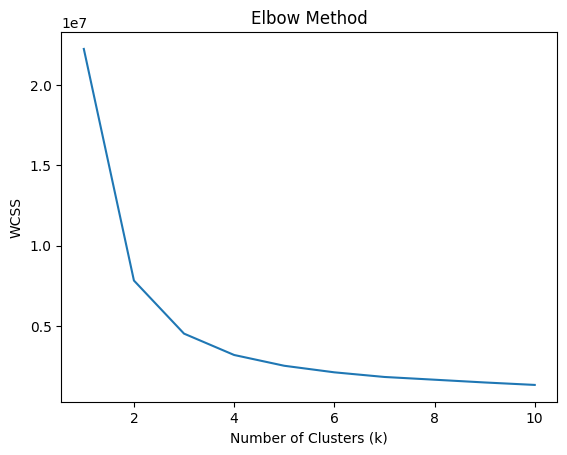

In [262]:
#implement elbow arm method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Sum of squared distances to the closest centroid (WCSS)

# Plot the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [263]:
#Print the dataset of comparison
print(X)

       sit and bend forward_cm  broad jump_cm
0                         18.4          217.0
1                         16.3          229.0
2                         12.0          181.0
3                         15.2          219.0
4                         27.1          217.0
...                        ...            ...
13388                     17.4          198.0
13389                      1.1          167.0
13390                     16.4          229.0
13391                      9.2           75.0
13392                      7.1          180.0

[13393 rows x 2 columns]


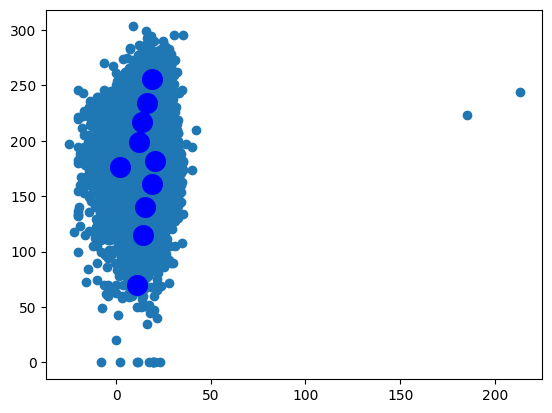

In [264]:
#Plot data

# Plot the data
plt.scatter(X['sit and bend forward_cm'], X['broad jump_cm'])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='blue')                           # Set centroid color
plt.show()